<a href="https://colab.research.google.com/github/MiamiCrypto/cv2/blob/main/Week_3_CV_Contrast_and_Threshold_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
!git clone https://github.com/MiamiCrypto/cv2

fatal: destination path 'cv2' already exists and is not an empty directory.


In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
plt.rcParams['image.cmap'] = 'gray'

# Exercise 1 - Contrast

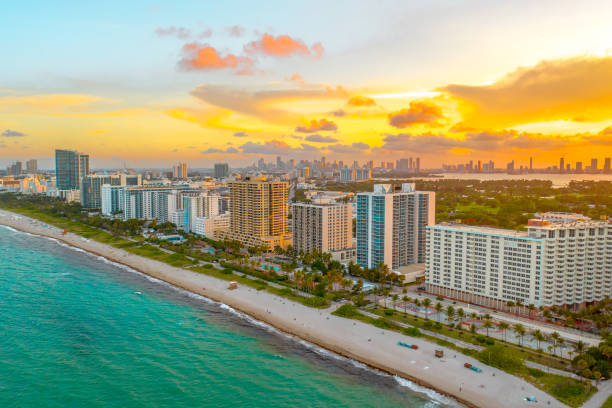

In [51]:
# Read the image ('miamibeach.jpg')
image = '/content/cv2/miamibeach.jpg'
img = cv2.imread(image, cv2.IMREAD_COLOR)

# Display the image.
Image(filename=image, width='500')

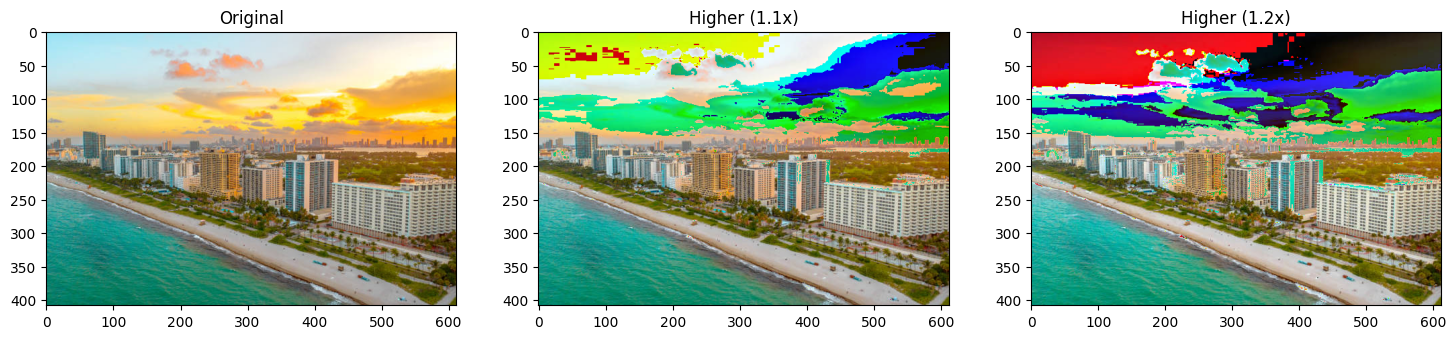

In [52]:
# Create a matrix of ones (with data type float64)
matrix = np.ones(img.shape, dtype = 'float64')

# Create two higher contrast images using the 'scale' option with factors of 1.1 and 1.2 (without overflow fix)
matrix1 = matrix * 1.1
matrix2 = matrix * 1.2

# Create brighter and darker images.

# Display the images
img_higher1  = np.uint8(cv2.multiply(np.float64(img), matrix1))
img_higher2  = np.uint8(cv2.multiply(np.float64(img), matrix2))

# Display the images (original, higher (1.1x) , high (1.2x))
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img[:, :, ::-1]);         plt.title('Original')
plt.subplot(132); plt.imshow(img_higher1[:, :, ::-1]); plt.title('Higher (1.1x)')
plt.subplot(133); plt.imshow(img_higher2[:, :, ::-1]); plt.title('Higher (1.2x)');

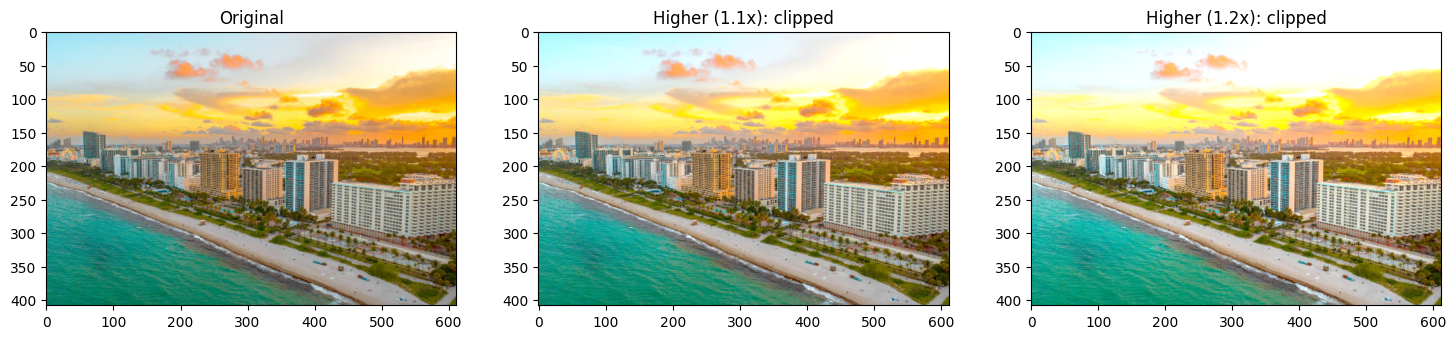

In [53]:
# Create higher contrast images using scale factors of 1.1 and 1.2 (using np.clip() to clip high values to 255)
img_higher1  = np.uint8(np.clip(cv2.multiply(np.float64(img), matrix1) , 0, 255))
img_higher2  = np.uint8(np.clip(cv2.multiply(np.float64(img), matrix2) , 0, 255))

# Display the images (original, higher (1.1x) clipped , high (1.2x) clipped)
plt.figure(figsize = [18,5])
plt.subplot(131); plt.imshow(img[:, :, ::-1]);         plt.title('Original')
plt.subplot(132); plt.imshow(img_higher1[:, :, ::-1]); plt.title('Higher (1.1x): clipped')
plt.subplot(133); plt.imshow(img_higher2[:, :, ::-1]); plt.title('Higher (1.2x): clipped');

# Exercise 2 - Threshold

Text(0.5, 1.0, 'Thresholded (global: 130)')

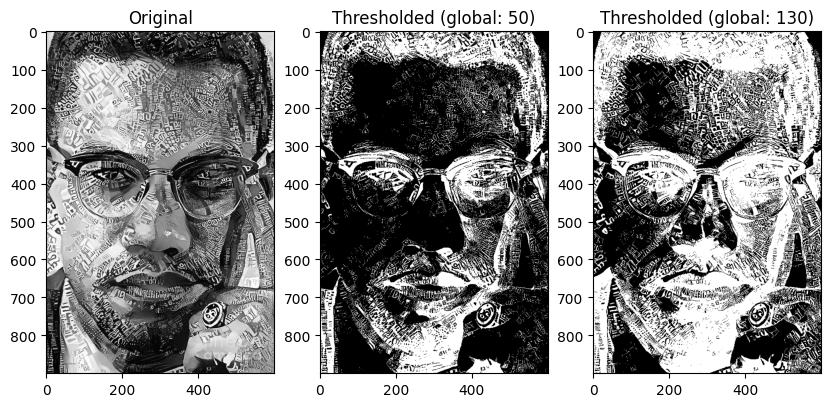

In [54]:
# Read original image in grayscale
img = cv2.imread('/content/cv2/Malcom.jpg', cv2.IMREAD_GRAYSCALE)

# Perform global thresholding (find the best global threshold that isolates the music from the shadows).
# Use a threshold type of: cv2.THRESH_BINARY_INV

# Perform global thresholding.
retval, img_thresh = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY_INV)

# Perform global thresholding.
retval, img_thresh_2 = cv2.threshold(img, 130, 255, cv2.THRESH_BINARY_INV)

# Display the images.
plt.figure(figsize = [10,6])
plt.subplot(131); plt.imshow(img);        plt.title('Original')
plt.subplot(132); plt.imshow(img_thresh); plt.title('Thresholded (global: 50)')
plt.subplot(133); plt.imshow(img_thresh_2); plt.title('Thresholded (global: 130)')

# Exercise 3 - Mask

(1000, 1000, 3)
(1000, 1000, 3)


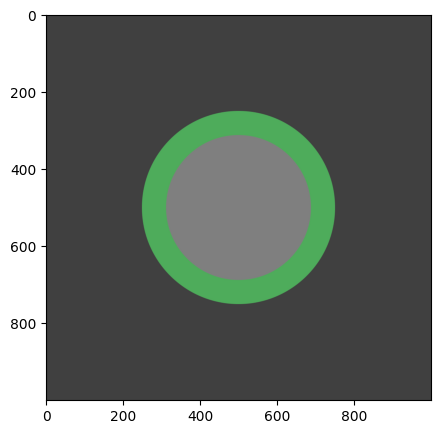

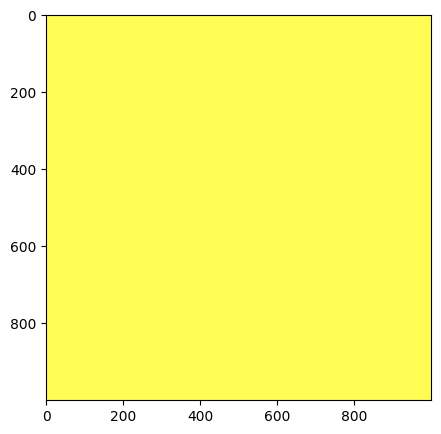

In [55]:
img_cir = cv2.imread('/content/cv2/green_circle.png', cv2.IMREAD_COLOR)

# Print the image shape.
print(img_cir.shape)
cir_h = img_cir.shape[0]
cir_w = img_cir.shape[1]

# Display the image.
plt.figure(figsize = [5, 5])
plt.imshow(img_cir[:, :, ::-1]);

# Read the yellow square image
img_yellow_square = cv2.imread('/content/cv2/yellow_square.png', cv2.IMREAD_COLOR)

# Set the dimension of the yellow square to be the same as the green circle.
dim = (cir_w, cir_h)
img_yellow_square = cv2.resize(img_yellow_square, dim, interpolation = cv2.INTER_AREA)

# Print the image shape.
print(img_yellow_square.shape)

# Display the image.
plt.figure(figsize = [5, 5])
plt.imshow(img_yellow_square[:, :, ::-1]);

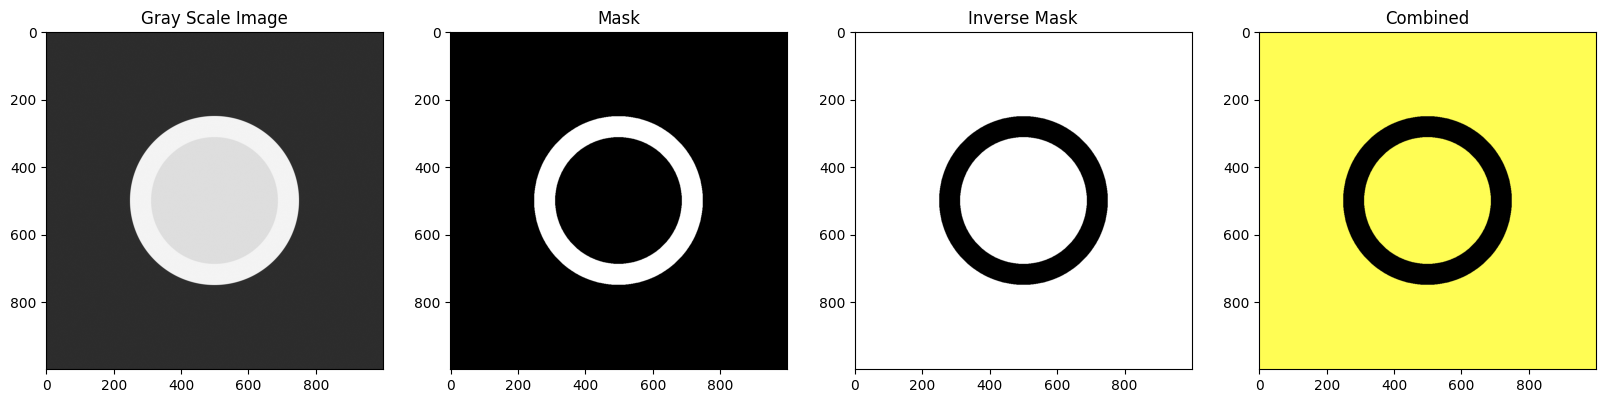

In [56]:
# Convert the green circle image to grayscale using cvtColor()
img_gray_circle = cv2.cvtColor(img_cir, cv2.COLOR_BGR2GRAY)

# Use the threshold() function to create a binary mask (white RING inside a black square).
# Hint: You will need to CARFULLY choose a threshold value that isolates the light gray ring.

retval, img_ring_mask = cv2.threshold(img_gray_circle, 130, 255, cv2.THRESH_BINARY)

# Use the bitwise_not() function to create an inverse mask.
img_ring_mask_inv = cv2.bitwise_not(img_ring_mask)

# Use bitwise_and() to create the final combined image (black ring on a yellow square)
img_combined = cv2.bitwise_and(img_yellow_square, img_yellow_square, mask = img_ring_mask_inv)

# Display the images.

plt.figure(figsize = [20,10])
plt.subplot(141); plt.imshow(img_gray_circle);          plt.title('Gray Scale Image')
plt.subplot(142); plt.imshow(img_ring_mask);            plt.title('Mask')
plt.subplot(143); plt.imshow(img_ring_mask_inv);        plt.title('Inverse Mask')
plt.subplot(144); plt.imshow(img_combined[:, :, ::-1]); plt.title('Combined');